In [86]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

df = pd.read_csv("CompleteDataset.csv", low_memory=False)

#Data Cleaning
scotland = df.loc[df['Nationality'] == "Scotland"] #Searches Nationality Column and adds all players with "Scotland" as nationality
positions = scotland['Preferred Positions'] #Creates a seperate series for preferred positions
stats = scotland.iloc[:, 13:20]
scotland = scotland.iloc[: , 1:8] #Makes the DF only the columns I believe are relevant
scotland = pd.concat([scotland, positions, stats], axis=1) #Merges the filtered Scotland DF and Positions so that positions can be used
scotland['Preferred Positions'] = scotland['Preferred Positions'].str[:3] #Gets rid of any excess str in positions, showing the most preferred position only

print("Number of Scottish players: ", len(scotland))
scotland.head()

Number of Scottish players:  300


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Preferred Positions,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing
931,M. Phillips,26,https://cdn.sofifa.org/48/18/players/188166.png,Scotland,https://cdn.sofifa.org/flags/42.png,77,78,LM,88,55,78,71,74,67,77
1080,T. Cairney,26,https://cdn.sofifa.org/48/18/players/195202.png,Scotland,https://cdn.sofifa.org/flags/42.png,77,80,RM,74,51,80,74,80,77,70
1255,D. Fletcher,33,https://cdn.sofifa.org/48/18/players/138782.png,Scotland,https://cdn.sofifa.org/flags/42.png,76,76,CDM,53,80,62,57,75,83,72
1465,S. Brown,32,https://cdn.sofifa.org/48/18/players/134820.png,Scotland,https://cdn.sofifa.org/flags/42.png,76,76,CDM,68,88,80,73,71,85,64
1467,J. Morrison,31,https://cdn.sofifa.org/48/18/players/162981.png,Scotland,https://cdn.sofifa.org/flags/42.png,76,76,CM,66,69,76,77,77,74,83


## ------------------------------------------------
I chose to use the Fifa 18 dataset linked on Canvas. I decided to use this dataset because I am a fan of the Fifa franchise and have followed football for a long time, so its all data that I am used to dealing with or have some form of experience with.

Furthermore, I made it so that it is only Scottish players. Absolutely no reason why, I promise :)

Cleaning wise, I filtered it to only Scottish players as well as picked the actual skill stats, removing all of the position ratings, leaving me with player info, base stats and their preferred position.

By using the ".str[:3]", it gets rid of any excess positions and shows only preferred player position. This works because some positions are 3 characters long, others are two but there was a space after it so it can get rid of anything after character 3 of the string
## ------------------------------------------------


In [87]:
scotland['Acceleration'] = scotland['Acceleration'].str[:2]
scotland['Acceleration'] = scotland['Acceleration'].astype(float)
scotland['Aggression'] = scotland['Aggression'].str[:2]
scotland['Aggression'] = scotland['Aggression'].astype(float)
scotland['Agility'] = scotland['Agility'].str[:2]
scotland['Agility'] = scotland['Agility'].astype(float)
scotland['Balance'] = scotland['Balance'].str[:2]
scotland['Balance'] = scotland['Balance'].astype(float)
scotland['Ball control'] = scotland['Ball control'].str[:2]
scotland['Ball control'] = scotland['Ball control'].astype(float)
scotland['Composure'] = scotland['Composure'].str[:2]
scotland['Composure'] = scotland['Composure'].astype(float)
scotland['Crossing'] = scotland['Crossing'].str[:2]
scotland['Crossing'] = scotland['Crossing'].astype(float)

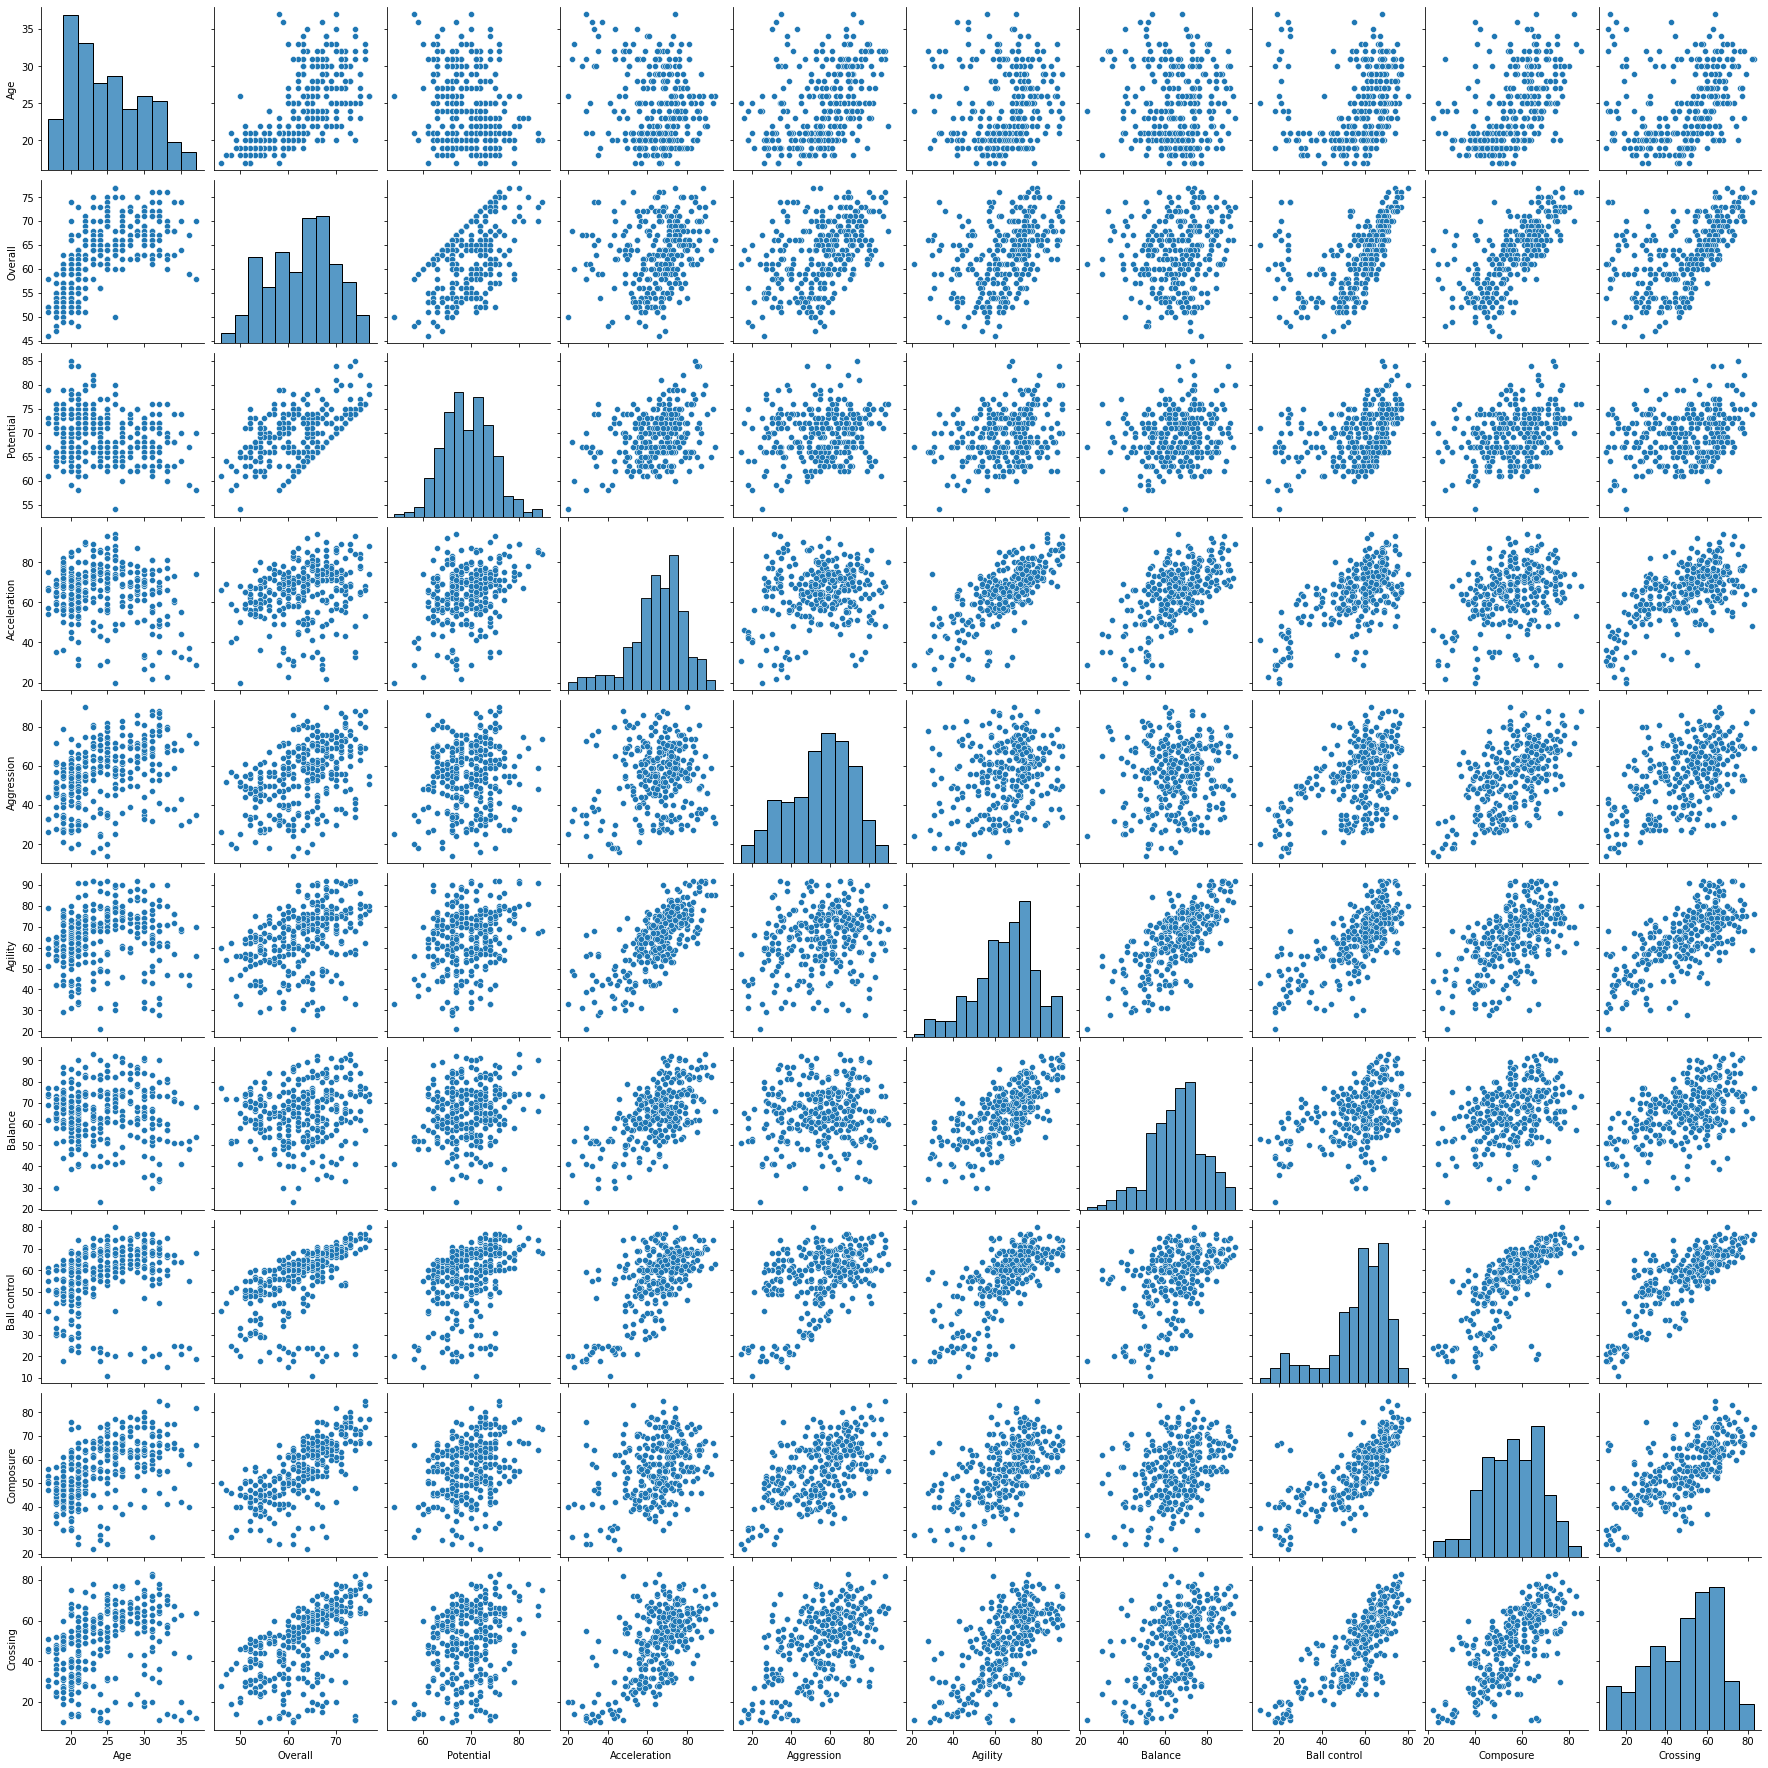

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(scotland)
plt.show()

In [94]:
y = scotland['Preferred Positions'] 
X = scotland.loc[:,'Acceleration': 'Crossing']
X = normalize(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbours (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbour model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.35833333333333334

## ------------------------------------------------
I had to continue cleaning the data as some parts of the stats had "+" or "-" in them, so I cut the size of the strings to first 2 characters and then converted them to float. This is okay because the + and - are to do with potential in the first season. Young players grow in potential, so they get +. Old players who are close to retiring decrease in rating, meaning their stats decrease. 

Because I am not doing anything related to potential, I felt it was okay to remove that so I could move on with the assignment.

After that, I split the data into training and test data, as well as normalize the data to make it all into the same format.

Then, I do KNN (K-Nearest Neighbour) to check the knn score of the prediction, which shows that only **35%** of the predictions were accurate.




In [95]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[ 3,  0,  1,  0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  7,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 3,  0,  1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 5,  0,  1,  0,  5,  0,  1,  1,  0,  0,  2,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  0,  1,  0,  0,  1,  2,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  2,  0,  1],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  4,  0,  1,  2,  0,  0,  2,  0,  0,  0],
       [ 5,  0,  0,  0,  1,  0,  1,  2,  0,  0,  3,  3,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0, 11]],
      dtype=int64)

In [91]:
precision =3 / (3+2+3+5+2+4+1+2+5+1+3)
recall = 3 / (3+1+3+1)
print("precision = ", precision, "\nrecall = ", recall)

precision =  0.0967741935483871 
recall =  0.375
